---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 7

---

Please write your full name here
- **Name** : Habiba Mohsen Ateya

# Part 1 Clustering

In this part of the assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

## Question 0
Set random seed to 100

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=100)

## Question 1
Scatter plot the dataset

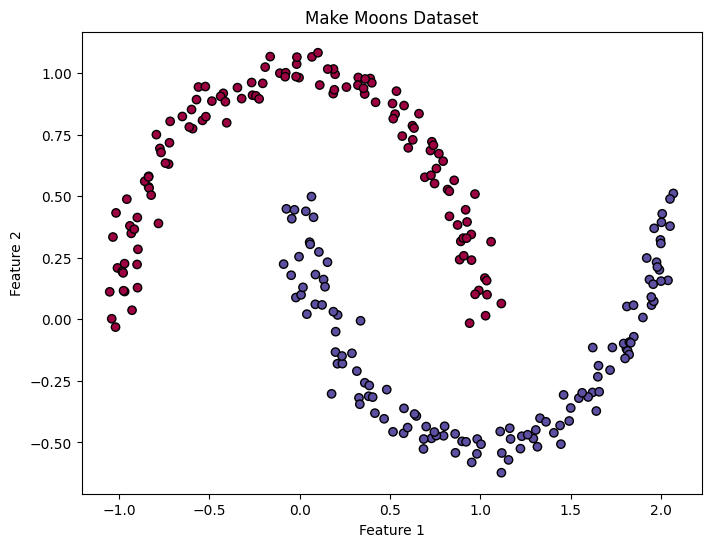

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Dataset')
plt.show()

## Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

**ANSWER:**

K-means won't perform well on the above datasets for the following reason:
K-Means looks for circular clusters. The make_moons dataset has two moon-shaped clusters, which are not circular. This means K-Means won't be able to properly find and separate these shapes.




## Question 3
1. Use Elbow method to find best "k". (Use inertia as metric). Use a range of K from the 1 to 15
2. Plot the elbow graph.
3. Train SKlearn KMeans model using the **best k** you found.
4. Scatter plot the results and **color** the clusters

**NOTE**

If you get a memory leak warning, please follow the following link: https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

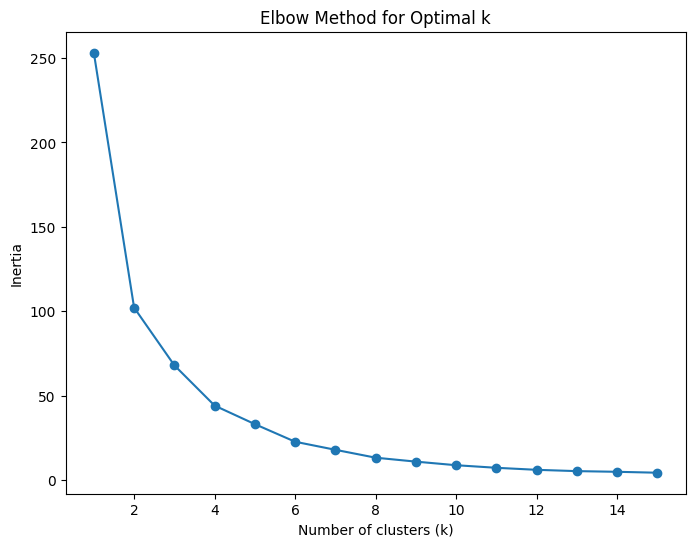

In [ ]:
# Elbow method to find best k
inertia=[]
k_range=range(1,16)
for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


from visual inspection of the elbow curve the best number of clusters is potentially 2 as the inertia decreases signficantly after 2
It could also be 4 as the inertia changes signficantly after 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


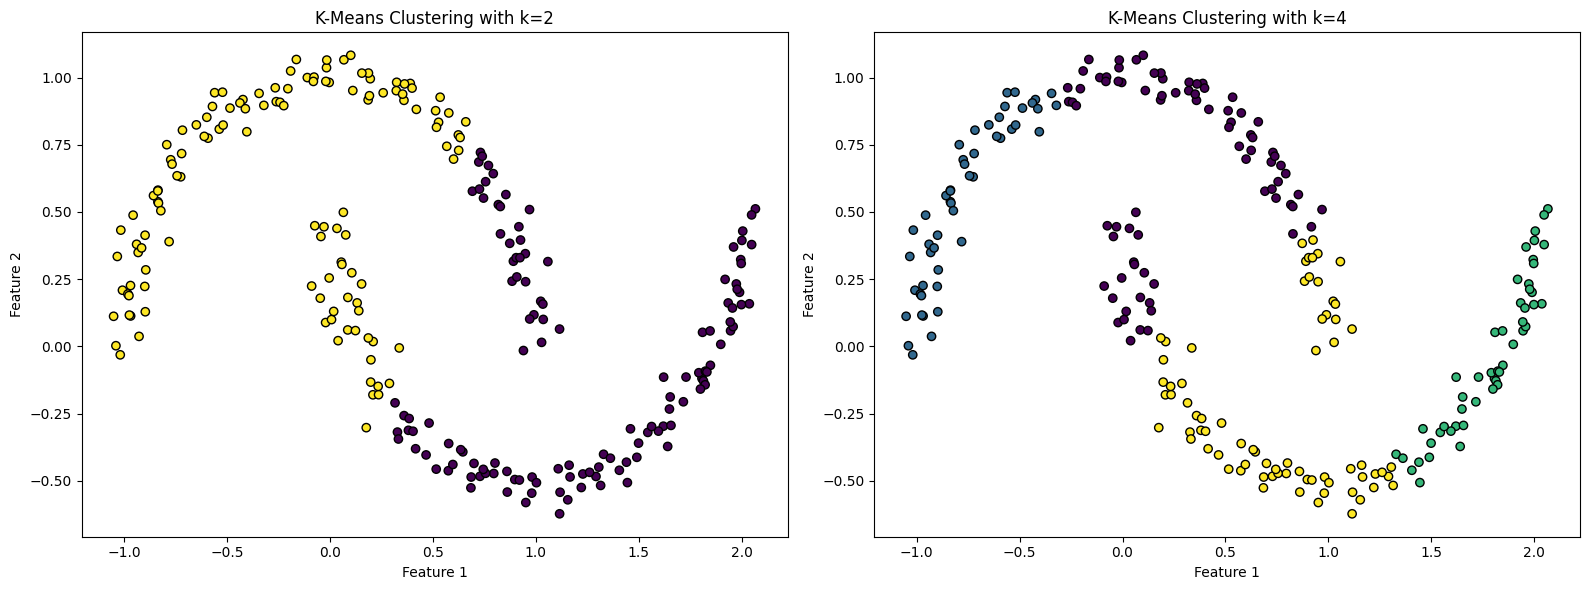

In [ ]:
best_k_1 = 2
best_k_2= 4

# Train the KMeans model using the best k found
kmeans_1 = KMeans(n_clusters=best_k_1, random_state=42)
kmeans_1.fit(X)
y_kmeans_1 = kmeans_1.predict(X)
kmeans_2 = KMeans(n_clusters=best_k_2, random_state=42)
kmeans_2.fit(X)
y_kmeans_2 = kmeans_2.predict(X)


# Scatter plot the results and color the clusters

plt.figure(figsize=(16, 6))

# First subplot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_1, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with k={best_k_1}')

# Second subplot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_2, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with k={best_k_2}')

plt.tight_layout()
plt.show()


The k-means model with 4 clusters seem to be more optimal as it reduces the error of misclassification

## Question 4

- Try DBSCAN algorithm on the same data with the appropriate `eps` parameter value
- Scatter plot the results and color the clusters

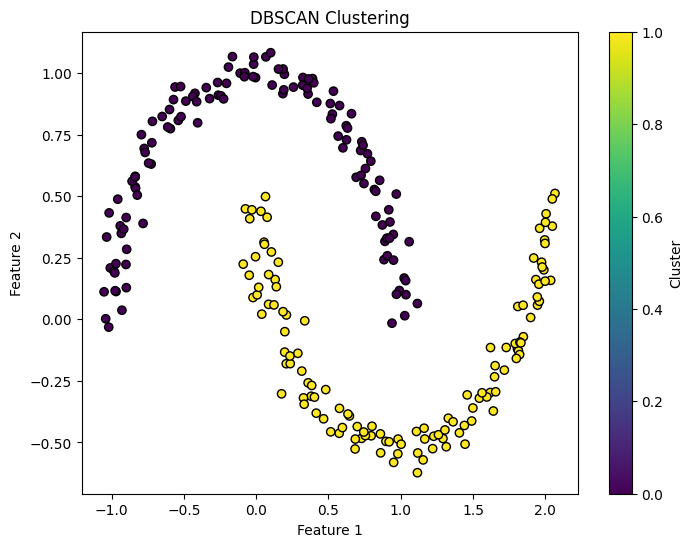

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Scatter plot the results and color the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()


## Question 5
**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

**ANSWER:**

DBSCAN was able to accurately identify the clusters as it forms the clusters based on the idea of high density regions and group them together
meanwhile the k-means always make circular clusters because it uses the idea of centroids which doesn't apply well to this dataset

## Question 6
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

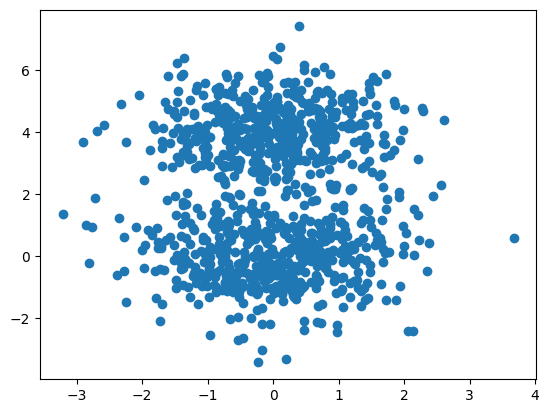

In [ ]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500)+4, rng.standard_normal(500)])
plt.scatter(x,y)

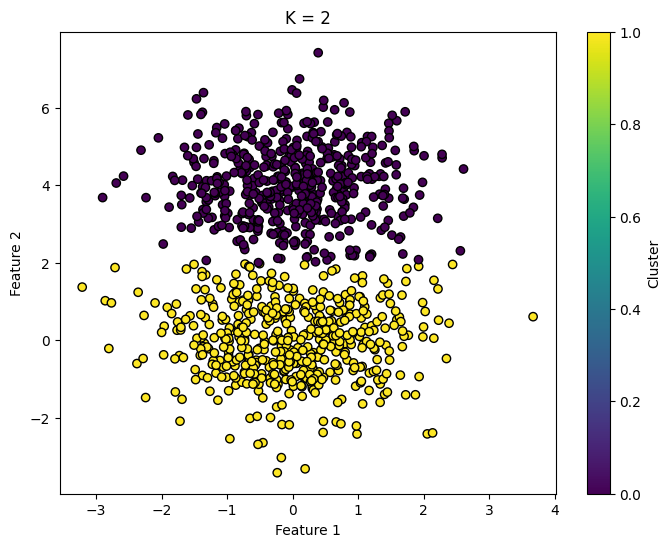

In [ ]:
data = np.column_stack((x, y))
clf = KMeans(n_clusters=2, random_state=42,n_init=10)
clf.fit(data)
y_clf = clf.predict(data)
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=y_clf, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K = 2')
plt.colorbar(label='Cluster')
plt.show()

## Question 7
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

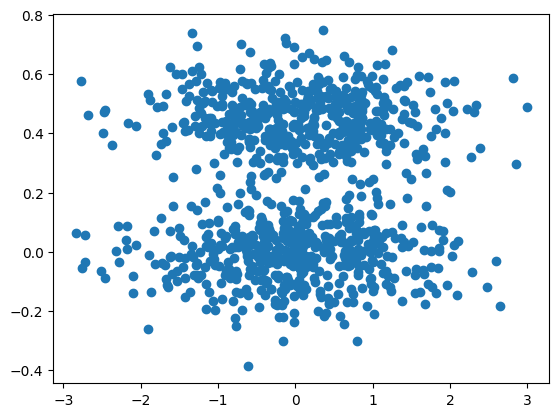

In [ ]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500) + 4.5, rng.standard_normal(500)]) / 10
plt.scatter(x,y)

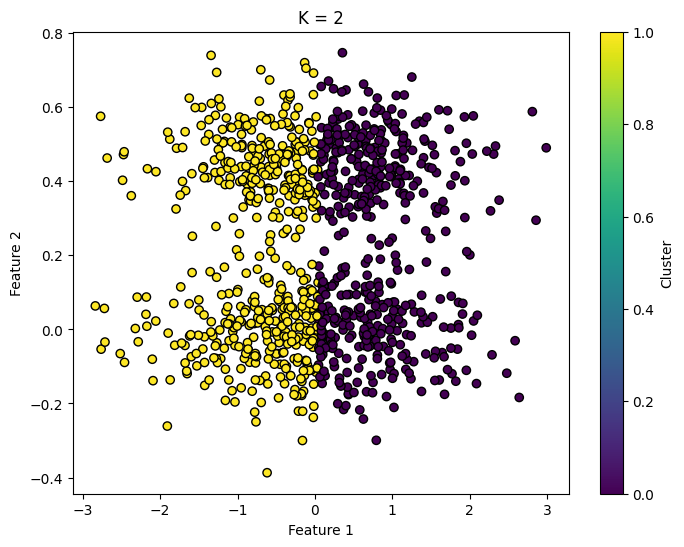

In [ ]:
data = np.column_stack((x, y))
clf = KMeans(n_clusters=2, random_state=42,n_init=10)
clf.fit(data)
y_clf = clf.predict(data)
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=y_clf, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K = 2')
plt.colorbar(label='Cluster')
plt.show()

## Question 8
Why did kmeans fail to cluster the data in question 7 but succeeded in question 6?


**ANSWER**:

Reasons why k means failed in question 7:

  * Sensitivity to Scale: K-means is sensitive to the scale of the features. In this dataset, the variance in the y dimension is much smaller compared to the x dimension. This could lead K-means to prioritize the x dimension over the y dimension, resulting in clusters that are elongated along the x-axis and not capturing the true structure of the data.

  * Assumption of circular Clusters: K-means assumes that clusters are circular and have the same variance along all dimensions. In this dataset, where the variance in y is much smaller than in x, the clusters may not be circular. K-means may struggle to capture elongated clusters along the x-axis.

  * Cluster Shape: In this dataset, the clusters may have irregular shapes due to the higher variance along the x-axis and the lower variance along the y-axis. K-means may not be able to capture these irregular shapes effectively, leading to poor clustering results.

Reasons why kmeans succeceed in question 6:
  * Balanced Variance: In question 6, both x and y dimensions have similar variances. This means that K-means won't overly prioritize one dimension over the other, leading to more balanced clustering along both dimensions.
  * Cluster Shape: K-means assumes clusters are circular and have the same variance along all dimensions. In question 6, if the clusters have similar variances along both dimensions, they are more likely to be spherical or isotropic, which aligns well with K-means' assumptions.

## Question 9

- Find a way to make kmeans succeed on the data and plot the results

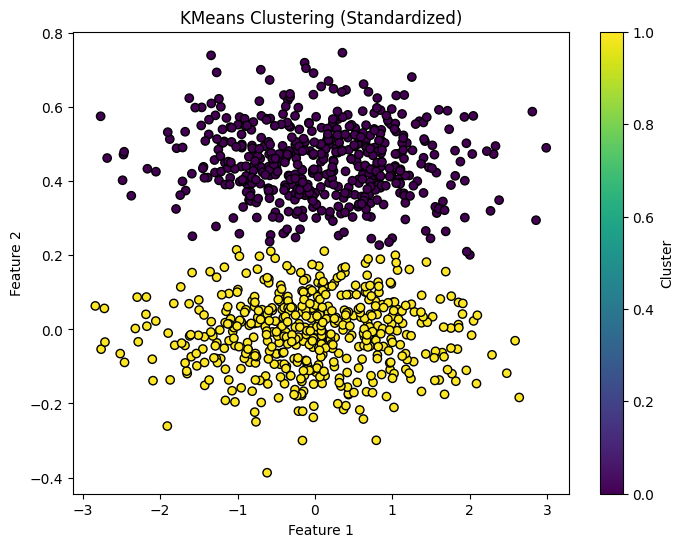

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization will lead to balanced variance

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

## Question 10
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

In [ ]:
def create_dataset(plot_original = False):
    np.random.seed(100)
    x = np.random.normal(0, 1, 500)
    y = np.random.normal(0, 1, 500)
    X_1 = np.vstack((x, y)).T

    x = np.random.normal(6, 1, 500)
    X_2 = np.vstack((x, y)).T

    X = np.vstack((X_1, X_2))
    if plot_original:
        plt.scatter(X[:, 0], X[:, 1])
        plt.title('Generated Data')
        plt.axis('equal');
    # Scaling matrix
    sx, sy = 0.7, 3.4
    Scale = np.array([[sx, 0], [0, sy]])

    # Rotation matrix
    theta = 0.77*np.pi
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array([[c, -s], [s, c]])

    # Transformation matrix
    T = Scale.dot(Rot)
    X_t = X - np.array([3,0])
    X_t = X_t.dot(T)
    return X_t

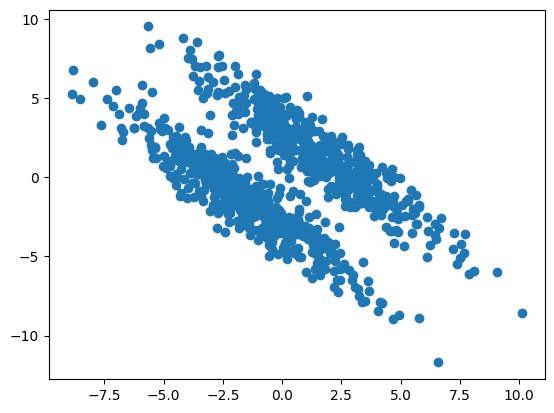

In [ ]:
X = create_dataset()
plt.scatter(X[:,0],X[:,1])

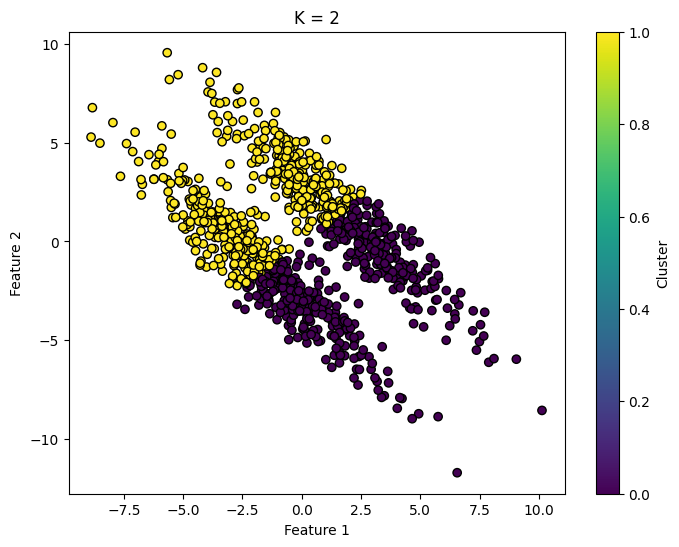

In [ ]:
clf = KMeans(n_clusters=2, random_state=42,n_init=10)
clf.fit(X)
y_clf = clf.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_clf, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K = 2')
plt.colorbar(label='Cluster')
plt.show()

## Question 11
Why did kmeans fail to cluster the data in question 10 but succeeded in question 6?


**ANSWER**:

#### Reasons it failed in question 10:
  * Different Variance in Clusters: The scaling matrix Scale applied to the clusters introduces different variances along the x and y dimensions, making the clusters elongated in different directions. K-means assumes equal variance along all dimensions, so it may incorrectly assign points to clusters based on their elongation rather than their actual proximity to the cluster center.

  * Different Density of Points: The clusters may have different densities of points after the transformation. K-means assumes that clusters have a similar density of points, but in this case, the transformed clusters may have different densities, making it challenging for K-means to accurately identify cluster boundaries.

  * Initialization Sensitivity: K-means is sensitive to the initial placement of centroids. The non-linear transformation may result in clusters that are non-convex and have complex shapes. If the initial centroids are not well-placed, K-means may converge to suboptimal solutions.
  
#### Reasons it succeeded in question 6:
  * circular Clusters: The second dataset consists of two clusters with equal variance along both dimensions, resembling circular clusters. K-means assumes circular clusters, and the second dataset aligns well with this assumption.

  * Similar Variance in Clusters: In the second dataset, both clusters have similar variance along both x and y dimensions. K-means works better when the variance within clusters is similar, as it can accurately capture the structure of the data.

  * Equal Density of Points: The second dataset has clusters with similar densities of points. K-means assumes that clusters have a similar density of points, and the second dataset satisfies this assumption.



## Question 12

1. Read the following blog -[link](https://janakiev.com/blog/covariance-matrix/#:~:text=Linear%20Transformations%20of%20the%20Data%20Set,-Next%20we%20will&text=which%20means%20that%20we%20can,transformed%20by%20Y%3DSX)-
2. Calculate a transformation that you can apply to the data to make kmeans succeed !!!
3. Plot the transformed data
4. Plot the kmeans result on the **ORIGINAL** data


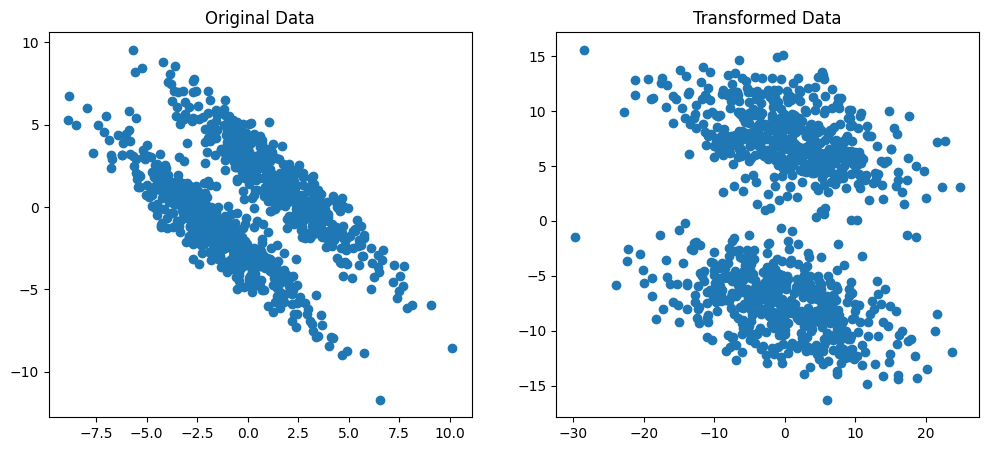

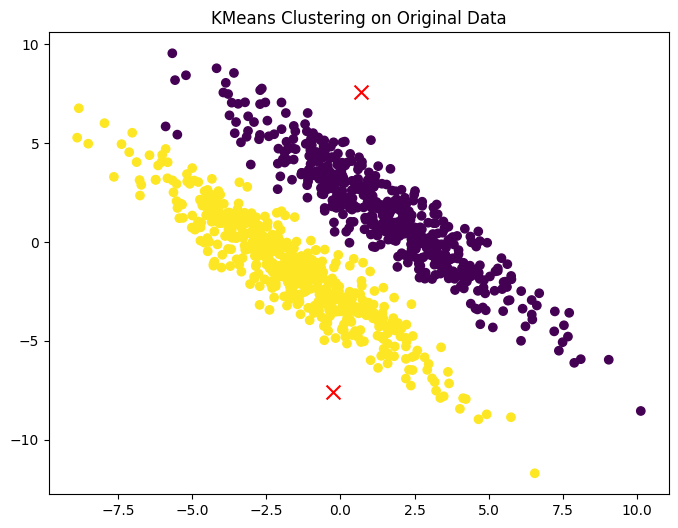

In [ ]:
# Calculate covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Calculate transformation matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
trans_matrix = eig_vecs.T.dot(np.diag(np.sqrt(eig_vals)))

# Apply transformation
X_transformed = X.dot(trans_matrix)

# Plot original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title('Transformed Data')

plt.show()

# Apply KMeans on original data
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)
kmeans.fit(X_transformed)
labels = kmeans.labels_

# Plot KMeans result on original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title('KMeans Clustering on Original Data')
plt.show()

# Part 2 PCA

In [ ]:
from matplotlib.colors import ListedColormap


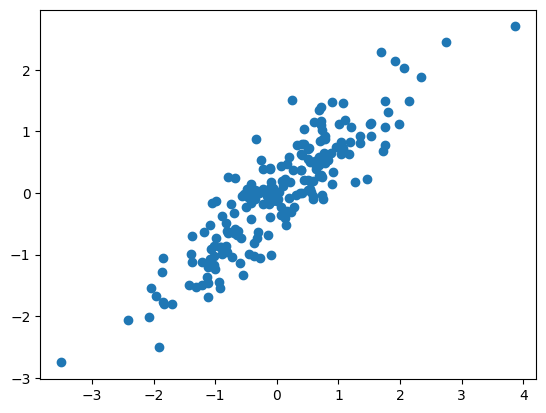

In [ ]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
#### YOUR FUNCTION
def pca(X):
    # Centering the data
    mean=np.mean(X,axis=0)
    centered_data= X-mean

    # Calculation of Covariance matrix
    cov_matrix=np.cov(centered_data,rowvar=False)


    # Obtaining eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Transforming the data
    X_reduced = centered_data.dot(sorted_eigenvectors)

    return sorted_eigenvectors, sorted_eigenvalues, X_reduced

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA eigenvectors over the ORIGINAL data with the correct directions!

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalue, X_transformed = pca(X)

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalue)

Eigenvalues are:  [1.82927343 0.10246373]


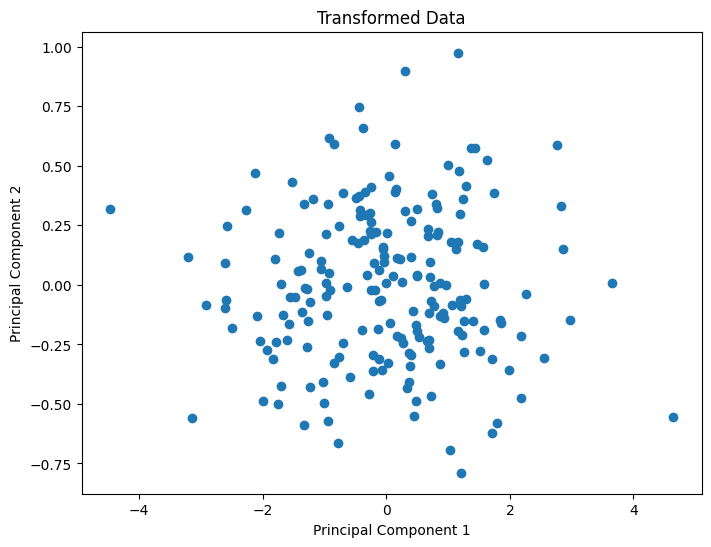

In [ ]:
# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')
plt.show()


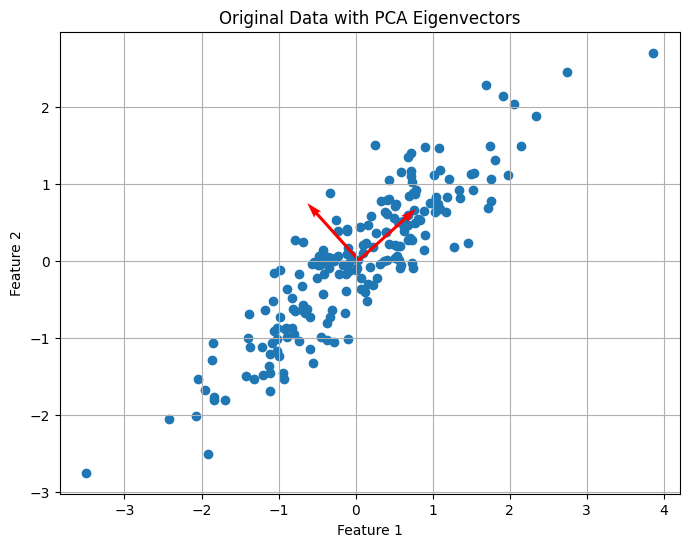

In [ ]:
mean=np.mean(X,axis=0)
# Plot the original data with eigenvectors
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data with PCA Eigenvectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Plot the eigenvectors
for i in range(len(sorted_eigenvectors)):
    plt.quiver(mean[0],mean[1],sorted_eigenvectors[0, i], sorted_eigenvectors[1, i],
               scale=1, scale_units='xy', color='r', width=0.005)

plt.axis('equal')
plt.show()


## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

eigenvalues = pca.explained_variance_

print("PCA Eigenvalues:", eigenvalues)

PCA Eigenvalues: [1.82927343 0.10246373]
